In [6]:
import math
import numpy as np
import seaborn as sns
from scipy.stats import t, norm
import matplotlib.pyplot as plt

In [7]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## Matched Pairs

Do husbands tend to be older than their wives?

The ages of five couples:
| Husband's age | Wife's age | Age Diff |
| --- | --- | --- |
| 43  |  41 |  2  |
| 71  |  70 |  1  |
| 32  |  31 |  1  |
| 68  |  66 |  2  |
| 27  |  26 |  1  |


The two-sample t-test is not applicable since the two samples are not independent.
Even if they were independent, the small differences in ages would not be significant since the standard deviations are large for husbands and also for the wives.

Since we have paired data, we can simply anaylize the differences obtained from each pair with a regular t-test, which in this context of **matched pairs** is called **paired t-test**.

$H_0$: population difference is zero

$$t= \frac{\bar{d}-0}{SE(\bar{d})}$$

, where $d_i$ is the age difference of the $ith$  couple.

$SE(\bar{d})=\frac{\sigma_d}{\sqrt{n}}$. Estimate $\sigma_d$ by $s_d = 0.55$. Then $t=\frac{1.4 - 0}{0.55/\sqrt{5}} = 5.69$

since $df=N-1$

p-value is 0.4% reject $H_0$

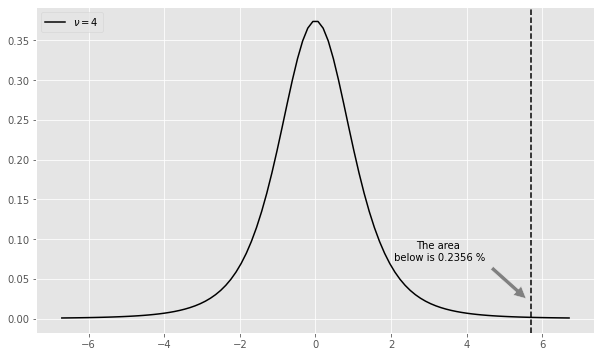

In [31]:

df = 4
t_score = 5.69

x = np.linspace(norm.ppf(0.00000000001),
                norm.ppf(0.99999999999), 100)
y = t.pdf(x, df)

ax = sns.lineplot(x=x, y=y, color='k',label=r'$\nu=4$')

area_whitin = t.sf(t_score, 4)*100


ax.annotate(f"The area\n below is {area_whitin:0.4f} %", xy=(t_score, 0.02),  xycoords='data',
            xytext=(0.72, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center')

_ = ax.axvline(t_score, color = 'k', linestyle="--")

What if didn't know the age difference $d_i$ but only if the husband was older or not?

$H_0$: half the husbans in the population are older than their wives

using 0/1 labels and a z-test, just as we tested whether a coin is fair:

$z=\frac{sum~of~1s - \frac{n}{2}}{SE~of~sum} = \frac{5 - \frac{5}{2}}{\sqrt{5\frac{1}{2}}} = 2.24~~~$ since $\sigma=\frac{1}{2}$ on $H_0$

p-value is 2.5%.

The p-value of this sign-test is less significant than that of the paired t-test. This is because the latter uses more information, namely the size of the differences. On the other band, the sign test has the virtue of easy interpretation due to the analogy to coin tossing.

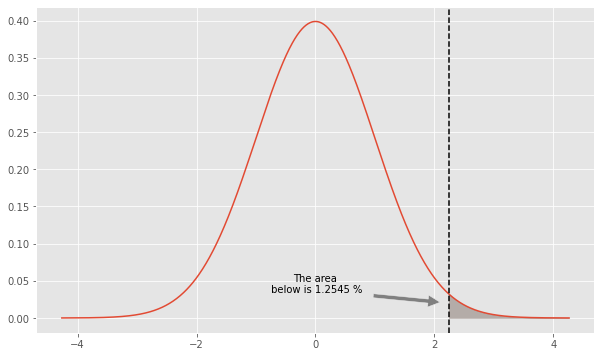

In [30]:

z_score = 2.24
# Create the curve from -4σ to 4σ
x = np.linspace(norm.ppf(0.00001),
                norm.ppf(0.99999), 1000)
y = norm.pdf(x)
ax = sns.lineplot(x=x, y=y)

# The number os standard deviations to plot

area_whitin = norm.sf(z_score)*100

ax.axvline(a_1, color = 'k', linestyle="--")

ax.annotate(f"The area\n below is {area_whitin:0.4f} %", xy=(z_score, 0.02),  xycoords='data',
            xytext=(0.5, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center')

_ = ax.fill_between(kde_x, kde_y, 
where=(x > z_score), 
interpolate=True, color='#85756d', alpha=0.50)